# TD-TME03: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP3 est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 3), en particulier, l'algorithme de classification hiérarchique.

## Préparation

Télécharger l'archive ici: http://webia.lip6.fr/~marsala/3i026/

Décompresser cette archive, elle crée le répertoire "TP03" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage qui seront utilisées dans ce TP.

Le but de ce TP est de compléter ce document ipython en rajoutant les fonctions demandées.

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles:

In [59]:
import math 
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

## Travail à réaliser

Le travail à faire se décompose en 2 phases:
- dans un premier temps, vous travaillerez sur la base d'apprentissage "base-2D.csv" qui contient des exemples décrits dans $R^2$. Cela vous permettra de visualiser plus simplement les résultats de vos fonctions
- dans un second temps, vous utiliserez toutes les fonctions écrites dans la phase précédente avec la base d'apprentissage "base-Paris.csv" 

**Attention**: vos fonctions devront **dès le départ** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par pd.read() fournit un DataFrame que vous avez appris à manipuler dans le TP02.

In [68]:
data_2D = pd.read_csv("data/base-2D.csv")

Une fois chargée, on peut afficher le contenu de la base d'apprentissage:

In [69]:
data_2D.head(-1)


,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


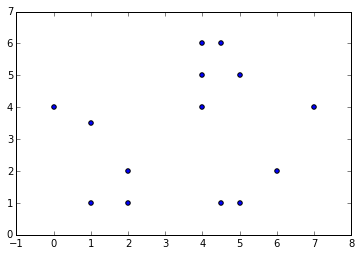

In [70]:
M_data2D= data_2D.as_matrix()      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

## Fonctions préliminaires

### Normalisation des données

Ecrire la fonction normalisation() qui prend en argument un DataFrame et rend la matrice obtenue en normalisant chaque colonne de ce DataFrame en appliquant la normalisation vue en cours.

*Rappel*: la librairie pandas permet de connaître le minimum et le maximum d'un DataFrame, par exemple:


In [192]:
def normalisation(dff) :
    df = dff.copy()
    for i in df.columns :
        mi = min(df[i])
        ma = max(df[i])
        df[i] =  (df[i]- mi) / (ma - mi)
    
    return df.as_matrix() 


Une fois la fonction de normalisation écrite, normaliser les données de la base-2D et afficher sa représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation.

In [193]:
MN_data2D = normalisation(data_2D)


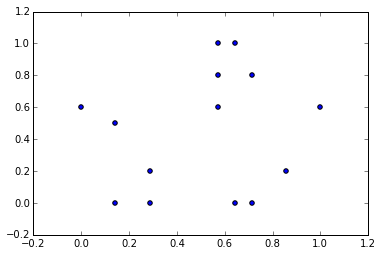

In [194]:
colonne_X= MN_data2D[0: , 0]        
colonne_Y= MN_data2D[0: , 1]       
plt.scatter(colonne_X, colonne_Y)

### Distances entre exemples

Ecrire la fonction dist_euclidienne_vect() qui prend en argument deux exemples et rend leur distance Euclidienne. 

In [1]:

def dist_euclidienne_vect(l1,l2) :
    sum = 0
    for i in range (len(l1)) :
        sum = sum + pow(l1[i] - l2[i],2)
    return math.sqrt(sum)

In [196]:
dist_euclidienne_vect([0.,0.6],[0.14285714,0.5])

0.17437936359839026

Ecrire la fonction dist_manhattan_vect() qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [2]:
def dist_manhattan_vect(l1,l2) :
    sum = 0
    for i in range (len(l1)) :
        sum = sum + abs(l1[i] - l2[i])
    return sumdef dist_manhattan_vect(d1,d2) :
    return (abs(d1.values-d2.values)).sum()

In [198]:
dist_manhattan_vect([0.,0.6],[0.14285714,0.5])

0.24285713999999997

Ecrire la fonction dist_vect() qui en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [199]:
def dist_vect(fonc,l1,l2):
    if(fonc == "euclidienne") :
        return dist_euclidienne_vect(l1,l2)
    else :
        return dist_manhattan_vect(l1,l2)

In [200]:
print(dist_vect("euclidienne",[ 0.,0.6],[ 0.14285714,0.5       ]))
print(dist_vect("mannathan",[ 0.,0.6],[ 0.14285714,0.5       ]))

0.174379363598
0.24285714


### Calcul de centroides

Ecrire la fonction centroide() qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fera l'hypothèse que la matrice contient toujours au moins un exemple.

In [201]:
M_data2D

array([[ 0. ,  4. ],
       [ 1. ,  3.5],
       [ 1. ,  1. ],
       [ 2. ,  1. ],
       [ 2. ,  2. ],
       [ 4. ,  4. ],
       [ 4. ,  5. ],
       [ 4. ,  6. ],
       [ 4.5,  1. ],
       [ 4.5,  6. ],
       [ 5. ,  1. ],
       [ 5. ,  5. ],
       [ 6. ,  2. ],
       [ 7. ,  4. ]])

In [202]:
def centroide(mat) : 
    l = list()
    for i in range(len(mat[0])) : 
        v= sum(mat[0:,i]) / len(mat[0:,i])
        l.append(v)
    return l

In [206]:
 d = pd.DataFrame(M_data2D)
MN_data2D  =normalisation(d)
centroide(MN_data2D)

[0.51020408163265307, 0.45000000000000001]

In [184]:
centroide(M_data2D)

[0.51020408163265307, 0.45000000000000001]

### Distances entre groupes d'exemples


Ecrire la fonction dist_groupes() qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

La distance est calculée en considérant le centroide de chacun des deux groupes.

In [185]:

def dist_groupes(fonc, m1, m2 ) :
    l1=centroide(m1)
    l2=centroide(m2)
    return dist_vect(fonc,l1,l2)

In [207]:
M_data2D

array([[ 0. ,  4. ],
       [ 1. ,  3.5],
       [ 1. ,  1. ],
       [ 2. ,  1. ],
       [ 2. ,  2. ],
       [ 4. ,  4. ],
       [ 4. ,  5. ],
       [ 4. ,  6. ],
       [ 4.5,  1. ],
       [ 4.5,  6. ],
       [ 5. ,  1. ],
       [ 5. ,  5. ],
       [ 6. ,  2. ],
       [ 7. ,  4. ]])

In [210]:
M_data2D = normalisation(pd.DataFrame(M_data2D) )
dist_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

0.5762405266233149

In [20]:
dist_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

0.5762405266233149

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, un clustering est représenté par une structure de données de type dictionnaire (dict() en python). Une clé de ce dictionnaire est un numéro de cluster (sous la forme d'une chaîne de caractères) et la valeur associée est une matrice contenant les exemples qui sont dans le cluster.

On appelle "clustering" un tel dictionnaire.


Ecrire la fonction initialise() qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrée que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [260]:
def initialise(mat) : 
    d = dict()
    for i in range(len(mat[0:,])) :
        d[i] = np.array([mat[i]])
    return d

In [261]:
depart = initialise(M_data2D)
depart 

{0: array([[ 0. ,  0.6]]),
 1: array([[ 0.14285714,  0.5       ]]),
 2: array([[ 0.14285714,  0.        ]]),
 3: array([[ 0.28571429,  0.        ]]),
 4: array([[ 0.28571429,  0.2       ]]),
 5: array([[ 0.57142857,  0.6       ]]),
 6: array([[ 0.57142857,  0.8       ]]),
 7: array([[ 0.57142857,  1.        ]]),
 8: array([[ 0.64285714,  0.        ]]),
 9: array([[ 0.64285714,  1.        ]]),
 10: array([[ 0.71428571,  0.        ]]),
 11: array([[ 0.71428571,  0.8       ]]),
 12: array([[ 0.85714286,  0.2       ]]),
 13: array([[ 1. ,  0.6]])}

In [262]:
depart = initialise(M_data2D)
depart 

{0: array([[ 0. ,  0.6]]),
 1: array([[ 0.14285714,  0.5       ]]),
 2: array([[ 0.14285714,  0.        ]]),
 3: array([[ 0.28571429,  0.        ]]),
 4: array([[ 0.28571429,  0.2       ]]),
 5: array([[ 0.57142857,  0.6       ]]),
 6: array([[ 0.57142857,  0.8       ]]),
 7: array([[ 0.57142857,  1.        ]]),
 8: array([[ 0.64285714,  0.        ]]),
 9: array([[ 0.64285714,  1.        ]]),
 10: array([[ 0.71428571,  0.        ]]),
 11: array([[ 0.71428571,  0.8       ]]),
 12: array([[ 0.85714286,  0.2       ]]),
 13: array([[ 1. ,  0.6]])}

### Variante 1: liaison par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation de liaison par centroides (c'est-à-dire que la distance entre 2 groupes d'exemples est la distance entre leurs centroides).

On commence par implémenter une fonction qui permet de regrouper les 2 groupes d'exemples les plus proches. C'est-à-dire que les 2 groupes qui minimisent la distance sont alors fusionnés pour ne former qu'un unique groupe.

Ecrire la fonction fusionne() qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et un clustering C0 et qui rend 4 valeurs:
- le clustering C1 obtenu après fusion des 2 groupes les plus proches
- les clés des 2 groupes de C0 qui ont été fusionnés (et donc retirés de C1)
- la distance qui séparait ces 2 groupes

In [400]:
def fusionne(fonc,clustering0) :
    if(len(clustering0 )== 1):
        return clustering0,0,0,0
    mini =10
    for i in clustering0.keys() :
        clusti = clustering0[i]
        for j in clustering0.keys() : 
            if(mini > dist_groupes(fonc,clusti ,clustering0[j]) and i != j) :
                mini = dist_groupes(fonc,clusti ,clustering0[j])
                indi = i
                indj = j
    #fusion 
    min_clus = np.concatenate((clustering0[indi],clustering0[indj]),axis=0)
            
    C1 = dict()
   
    for i in clustering0.keys() : 
        if( indj != i and indi!= i ) :
            C1[i] = clustering0[i]
            
    C1[max(clustering0.keys())+1] = min_clus
            
    return C1,indi,indj,mini        
            

### Construction de dendrogramme

In [401]:
dico,mini,minj,dis = fusionne("euclidienne",depart )
M_Fusion = [mini,minj,dis,2]
while len(dico) > 1:
    dico,mini,minj,dis = fusionne("euclidienne",dico)
    M_Fusion=  np.vstack((M_Fusion,[mini,minj,dis,2]))

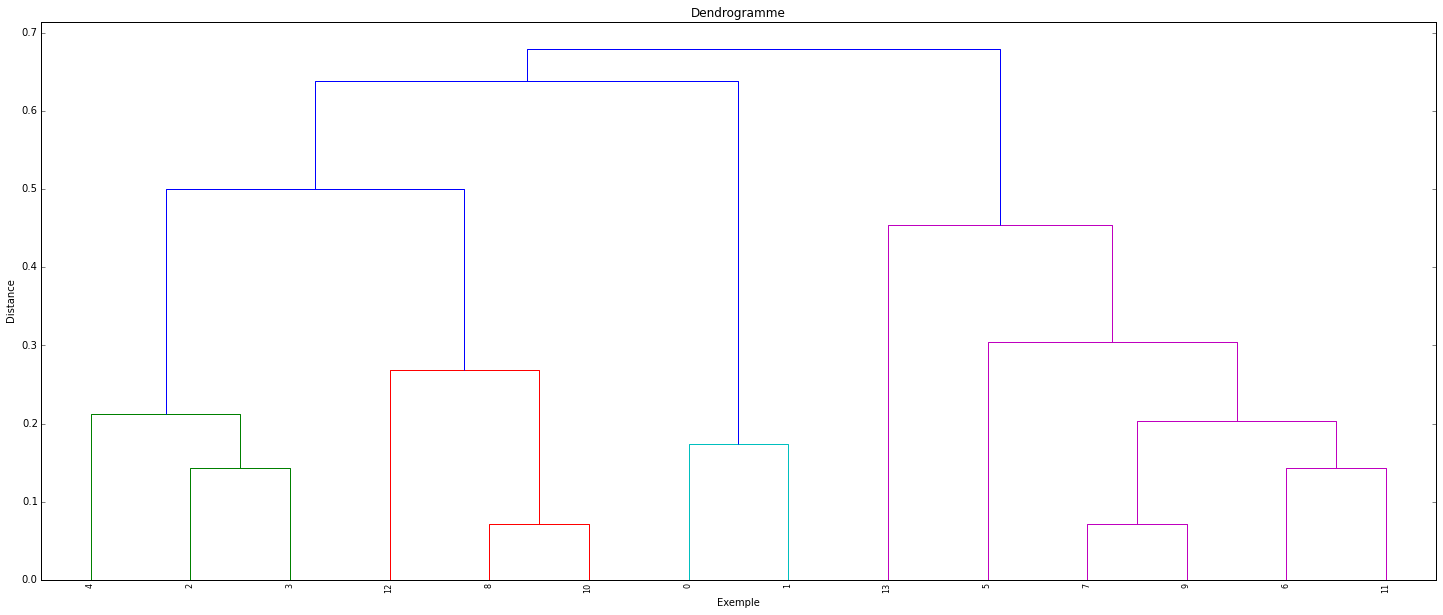

In [402]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(25, 10))
plt.title('Dendrogramme')
plt.xlabel('Exemple')
plt.ylabel('Distance')
dendrogram(
    M_Fusion,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Ecrire la fonction clustering_hierarchique() qui, pour une base d'apprentissage et une distance donnée, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenue.
La fonction rend la matrice M_Fusion construite.

### Comparaison de distances

Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance Euclidienne.

### Variante 2: liaison complète (maximum des distances)

On considère la distance entre deux groupes d'exemples vue en cours : la distance entre le groupe G1 et entre le groupe G2 est égale à la plus grande distance existante entre un exemple de G1 et un exemple de G2.

Ecrire la fonction dist_max_groupes() qui, étant donné deux groupes, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux groupes d'exemples.


In [387]:
def dist_max_groupes(fonc,g1,g2) :
   
    maxi = -1
    for i in g1 :
        for j in g2 : 
            if(maxi < dist_vect(fonc,i ,j)) :
                maxi = dist_vect(fonc,i ,j)
    return maxi

In [388]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.118033988749895

In [131]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.118033988749895

La distance dist_max_groupes() est utilisée lors d'un clustering hiérarchique basé sur un lien complet ("complete linkage") entre les clusters (cf. cours).

Implémenter une variante du clustering hiérarchique qui utilise cette distance.

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris:
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

Etudier cette base et les clusters qui peuvent être mis en évidence.


**Attention**: il faudra certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faudra donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.


In [404]:
data_Paris = pd.read_csv("data/base-Paris.csv")

In [407]:
data_Paris.head(-1)

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total arrondissement 2011
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,NaN
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4,NaN
2,75014,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3,NaN
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8,NaN
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5,NaN
5,75018,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9,NaN
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5,NaN
7,75002,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,NaN
8,75004,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7,NaN
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,NaN


Préparer un rapport d'analyse réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.

In [426]:
M_dataParis= data_Paris.as_matrix()      # conversion du DataFrame en matrice pour la commande suivante
List_col= [[M_dataParis[0,0]]]

for i in M_dataParis[0,1:] :
    List_col = np.vstack((List_col,[i]))
plt.scatterList_col) # affichage des points

SyntaxError: invalid syntax (<ipython-input-426-f17cd1485473>, line 6)

In [412]:
M_dataParis= data_Paris.as_matrix()  
M_dataParis[0,]

array(['75007', '288.1', '249.1', '303.7', '255.8', '287.8', '288.4',
       '249.6', '185.6', '281.3', '284.3', '296.4', '301.1', nan], dtype=object)